# Extensions to Linear Models - Lab

## Introduction

In this lab, you'll practice many concepts learned in this section, from adding interactions and polynomials to your model to AIC and BIC!

## Summary

You will be able to:
- Build a linear regression model with polynomial features/interactions
- Perform regularization
- Use AIC and BIC to select the best value for the regularization parameter


## Let's get started!

Import all the necessary packages.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split


from sklearn.datasets import load_boston

## Look at a Baseline Boston Housing Data Model

Import the Boston housing data set, use all the predictors in their scaled version (using `preprocessing.scale`. Look at a baseline model using *scaled variables* as predictors. Use 5-fold cross-validation this time and use the $R^2$ score to evaluate the model.

In [65]:
# Your code here
regression = LinearRegression()
boston = load_boston()
y = pd.DataFrame(boston.target,columns = ["target"])
df = pd.DataFrame(boston.data, columns = boston.feature_names)

X_scaled = preprocessing.scale(df)
X_scaled = pd.DataFrame(X_scaled, columns = df.columns)

all_data = pd.concat([y,X_scaled], axis = 1)

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_scaled, y, scoring="r2", cv=crossvalidation))
baseline

0.7176324491383005

In [66]:
"""X_scaled=preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split (X_scaled,y, test_size=0.3, random_state=12 )

reg=LinearRegression().fit(X_train, y_train)



from sklearn.model_selection import cross_val_score

baseline = cross_val_score(reg, X_train, y_train,  cv=5)
print("R_square = " , np.mean(scores))"""

'X_scaled=preprocessing.scale(X)\nX_train, X_test, y_train, y_test = train_test_split (X_scaled,y, test_size=0.3, random_state=12 )\n\nreg=LinearRegression().fit(X_train, y_train)\n\n\n\nfrom sklearn.model_selection import cross_val_score\n\nbaseline = cross_val_score(reg, X_train, y_train,  cv=5)\nprint("R_square = " , np.mean(scores))'

## Include interactions

Look at all the possible combinations of variables for interactions by adding interactions one by one to the baseline model. Next, evaluate that model using 5-fold classification and store the $R^2$ to compare it with the baseline model.

You've created code for this before in the interactions lab, yet this time, you have scaled the variables so the outcomes may look different. 

Print the 7 most important interactions.

In [67]:
# Your code here
from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))

interactions = []
data = X_scaled.copy()
for comb in combinations:
    data["interaction"] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y, scoring="r2", cv=crossvalidation))
    if score > baseline: interactions.append((comb[0], comb[1], round(score,3)))
            
print("Top 7 interactions: %s" %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])


Top 7 interactions: [('RM', 'LSTAT', 0.783), ('RM', 'TAX', 0.775), ('RM', 'RAD', 0.77), ('RM', 'PTRATIO', 0.764), ('INDUS', 'RM', 0.757), ('NOX', 'RM', 0.746), ('RM', 'AGE', 0.742)]


Write code to include the 7 most important interactions in your data set by adding 7 columns. Name the columns "var1_var2" with var1 and var2 the two variables in the interaction.

In [68]:
# Your code here
df_inter = X_scaled.copy()
ls_interactions = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7]
for inter in ls_interactions:
    df_inter[inter[0]+"_"+inter[1]] =df[inter[0]]*df[inter[1]]
    
    
df_inter.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.417713  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.415269 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.415272 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.414680 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.410409 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  RM_LSTAT  \
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  32.74350   
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  58.68794   
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  28.95555   
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  20.57412   
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  38.09351   

     RM_TAX  RM_RAD  RM_PTRATIO  INDUS_RM    NOX_RM    RM_AGE  
0  1946.200   6.575    100.5975  15.18825  3.537350  428.6900  
1  1553.882  12.842    114.2938  45.39647  3.011449  506.6169  
2  1738.770  14.370    127.8930  50.79795  3.369765  439.0035  
3  1553.556  20.994    130.8626  15.25564  3.205084  320.5084  
4  1586.634  21.441    133.6489  15.58046  3.273326  387.3674

## Include Polynomials

Try polynomials of 2, 3 and 4 for each variable, in a similar way you did for interactions (by looking at your baseline model and seeing how $R^2$ increases). Do understand that when going for a polynomial of 4, the particular column is raised to the power of 2 and 3 as well in other terms. We only want to include "pure" polynomials, so make sure no interactions are included. We want the result to return a list that contain tuples of the form:

`(var_name, degree, R2)`, so eg. `('DIS', 3, 0.732)`

In [69]:
# Your code here
from sklearn.preprocessing import PolynomialFeatures
polynomials = []
for col in df.columns:
    for degree in [2,3,4]:
        data = X_scaled.copy()
        poly = PolynomialFeatures(degree, include_bias=False)
        X = poly.fit_transform(df[[col]])
        data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X)], axis = 1)
        score = np.mean(cross_val_score(regression, data, y, scoring="r2", cv=crossvalidation))
        if score > baseline: polynomials.append((col, degree, round(score,3)))
print("Top 10 polynomials: %s" %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])


Top 10 polynomials: [('RM', 4, 0.8), ('RM', 2, 0.782), ('LSTAT', 4, 0.782), ('RM', 3, 0.781), ('LSTAT', 3, 0.774), ('LSTAT', 2, 0.772), ('DIS', 3, 0.737), ('DIS', 2, 0.732), ('DIS', 4, 0.731), ('TAX', 4, 0.724)]


For each variable, print out the maximum R2 possible when including Polynomials.

In [70]:
# Your code here
polies=pd.DataFrame(polynomials)
polies.groupby([0], sort=False)[2].max()



0
ZN         0.723
INDUS      0.723
NOX        0.721
RM         0.800
AGE        0.722
DIS        0.737
RAD        0.719
TAX        0.724
PTRATIO    0.721
B          0.720
LSTAT      0.782
Name: 2, dtype: float64

Which two variables seem to benefit most from adding Polynomial terms?

Add Polynomials for the two features that seem to benefit the most, as in have the best R squared compared to the baseline model. For each of the two feature, raise to the Polynomial that generates the best result. Make sure to start from the data set `df_inter` so the final data set has both interactions and polynomials in the model.

In [71]:
# Your code here
for col in ["RM", "LSTAT"]:
    poly = PolynomialFeatures(4, include_bias=False)
    X = poly.fit_transform(df[[col]])
    colnames= [col, col+"_"+"2", col+"_"+"3", col+"_"+"4"]
    df_inter = pd.concat([df_inter.drop(col, axis=1),pd.DataFrame(X, columns=colnames)], axis = 1)
    


check out your final data set and make sure that your interaction terms as well as your polynomial terms are included.

In [72]:
# Your code here

df_inter.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'RM_LSTAT', 'RM_TAX', 'RM_RAD', 'RM_PTRATIO',
       'INDUS_RM', 'NOX_RM', 'RM_AGE', 'RM', 'RM_2', 'RM_3', 'RM_4', 'LSTAT',
       'LSTAT_2', 'LSTAT_3', 'LSTAT_4'],
      dtype='object')

## Full model R-squared

Check out the R-squared of the full model.

In [73]:
# Your code here
score = np.mean(cross_val_score(regression, df_inter, y, scoring="r2", cv=crossvalidation))
score


0.8061116489236815

## Finding the best Lasso regularization parameter

You've learned that, when using Lasso regularization, your coefficients shrink to 0 when using a higher regularization parameter. Now the question is which value we should choose for the regularization parameter. 

This is where the AIC and BIC come in handy! We'll use both criteria in what follows and perform cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator.

Read the page here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html and create a similar plot as the first one listed on the page. 

In [74]:
# Your code her 
from sklearn.linear_model import Lasso, Ridge, LinearRegression
ridgereg=Ridge(alpha=4).fit(df_inter, y)

score = np.mean(cross_val_score(ridgereg, df_inter, y, scoring="r2", cv=crossvalidation))
print(score)

ridgereg.coef_

0.8014160844784429


array([[-1.30102221e+00,  4.14249517e-02,  1.11540429e+00,
         5.86841407e-01, -6.93295474e-01,  9.09761943e-01,
        -1.79342393e+00,  1.28813644e+00,  1.22905993e+00,
         3.28233635e+00,  6.00985159e-01, -5.97652457e-02,
        -3.00002877e-03,  1.76126105e-02, -3.54433029e-01,
        -1.56018137e-02, -1.26495280e+00, -4.13658340e-03,
         1.01514996e-01, -2.36728519e-01,  2.22573009e-01,
        -1.12716001e-02, -2.82602956e+00,  2.17126313e-01,
        -7.42228379e-03,  9.11220107e-05]])

In [75]:
lassoreg=Lasso(alpha=3).fit(df_inter, y)

score = np.mean(cross_val_score(lassoreg, df_inter, y, scoring="r2", cv=crossvalidation))
print(score)

lassoreg.coef_



0.766114892372798


array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.58839006e-01,
       -1.75161766e-03,  1.91191562e-02, -8.19049456e-02,  8.77996599e-03,
       -0.00000000e+00,  2.80842082e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.53610486e-03, -0.00000000e+00, -0.00000000e+00,
        5.40258369e-04, -8.58410993e-06])

0.04606644293310453
[506.         504.77235836 414.7677569  369.22482001 200.48978219
 154.56500442 159.59477441 163.01020132 163.83472177 166.71223087
 169.81671665 170.42015914 176.08824164 170.01549254 175.93704217
 181.57419155 182.80286211 182.57580581 174.80602147 173.16884276
 179.23141269 184.61416995 184.40406943 182.96376089 182.84127057
 182.69676779 188.74713364 194.28937653 193.99700412 192.4922918
 198.36696515 197.25107572 197.25054591 203.47311123 209.44477352
 215.43791624 215.25105011 215.17218464 221.3826054  227.50985834
 227.22948778 220.34320001 220.2126054  219.79287129 219.50101874
 225.64215982 231.86736637 231.70773378 231.59500669 229.33611081
 229.07649496 234.92110398 234.80143274 228.46040526 228.45031321
 234.65678652 234.03506965 233.98121123 240.17768843]


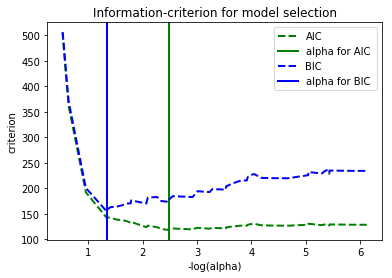

In [76]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC   
model_bic = LassoLarsIC(criterion='bic')  #create instance and define the model parameter. if it is bic it is bic model
model_bic.fit(df_inter, y)
alpha_bic_ = model_bic.alpha_    #it picks the feature that generates lowest aic bic
print( alpha_bic_) 
print(model_bic.criterion_)
model_aic = LassoLarsIC(criterion='aic') #it the parameter aic , you can get the aic model
model_aic.fit(df_inter, y)
alpha_aic_ = model_aic.alpha_ 


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color, linewidth=2, label= name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=2,
                label='alpha for %s ' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'green')
plot_ic_criterion(model_bic, 'BIC', 'blue')
plt.legend()
plt.title('Information-criterion for model selection');

Performing feature selection: comparing models with only a few variables and more variables, computing the AIC/BIC and select the features that generated the lowest AIC or BIC
Similarly, selecting or not selecting interactions/polynomial features depending on whether or not the AIC/BIC decreases when adding them in
Computing the AIC and BIC for several values of the regularization parameter in Ridge/Lasso models and selecting the best regularization parameter.
Many more!

## Analyze the final result

Finally, use the best value for regularization parameter according to AIC and BIC and compare the R squared parameters and MSE using train-test-split. Compare with the baseline model.

In [82]:

def run_model(model,X_train,X_test,y_train,y_test):
    
    print('Training R^2 :',model.score(X_train,y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :',model.score(X_test,y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error',np.sqrt(mean_squared_error(y_test,y_pred_test)))

In [91]:
# Code for baseline model


X_train, X_test, y_train, y_test = train_test_split (df_inter, y, test_size=0.3, random_state=12 )

reg=LinearRegression().fit(X_train, y_train)

run_model(reg, X_train,X_test,y_train,y_test)

Training R^2 : 0.8493217973015355
Training Root Mean Square Error 3.529954308378633

----------------

Testing R^2 : 0.7938646490796002
Testing Root Mean Square Error 4.252501989343672


In [96]:
# code for lasso with alpha from AIC

lassoreg=Lasso(alpha=alpha_bic_).fit(X_train, y_train)
run_model(lassoreg, X_train,X_test,y_train,y_test)

Training R^2 : 0.8368717098146593
Training Root Mean Square Error 3.672894977979949

----------------

Testing R^2 : 0.7604839569477487
Testing Root Mean Square Error 4.583904817070087


In [97]:
# code for lasso with alpha from BIC
lassoreg=Lasso(alpha=alpha_aic_).fit(X_train, y_train)
run_model(lassoreg, X_train,X_test,y_train,y_test)


Training R^2 : 0.8421253250957326
Training Root Mean Square Error 3.6132674015998463

----------------

Testing R^2 : 0.7674145345745379
Testing Root Mean Square Error 4.5170986234869135


## Level Up - Optional

### Create a Lasso Path

From this section, you know that when using lasso, more parameters shrink to zero as your regularization parameter goes up. In Scikit-Learn there is a function lasso_path which visualizes the shrinkage of the coefficients while alpha changes. Try this out yourself!

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

### AIC and BIC for subset selection
This notebook shows how you can use AIC and BIC purely for feature selection. Try this code out on our Boston Housing data!

https://xavierbourretsicotte.github.io/subset_selection.html

## Summary

Congratulations! You now know how to create better linear models and how to use AIC and BIC for both feature selection and to optimize your regularization parameter when performing Ridge and Lasso. 